In [3]:
import pandas as pd
from sklearn.cluster import KMeans

In [4]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import load_iris

In [7]:
iris = load_iris()

In [13]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [27]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [41]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


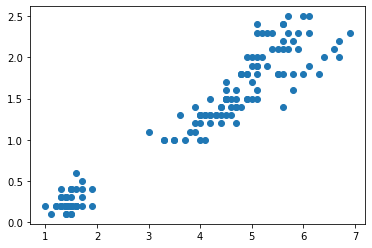

In [42]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])

In [37]:
df['target'] = iris.target

In [38]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [60]:
km = KMeans(n_clusters=3)
yp = km.fit_predict(df[['petal length (cm)']], df[['petal width (cm)']])
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [61]:
df['clusterP'] = yp

In [62]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,clusterP
0,5.1,3.5,0.067797,0.041667,0,1
1,4.9,3.0,0.067797,0.041667,0,1
2,4.7,3.2,0.050847,0.041667,0,1
3,4.6,3.1,0.084746,0.041667,0,1
4,5.0,3.6,0.067797,0.041667,0,1


In [54]:
df.drop(['petal predicted', 'cluster', 'clusters'], axis = 1, inplace = True)

In [63]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,clusterP
0,5.1,3.5,0.067797,0.041667,0,1
1,4.9,3.0,0.067797,0.041667,0,1
2,4.7,3.2,0.050847,0.041667,0,1
3,4.6,3.1,0.084746,0.041667,0,1
4,5.0,3.6,0.067797,0.041667,0,1


In [64]:
df1 = df[df.clusterP == 0]
df2 = df[df.clusterP == 1]
df3 = df[df.clusterP == 2]

Text(0, 0.5, 'petal width (cm)')

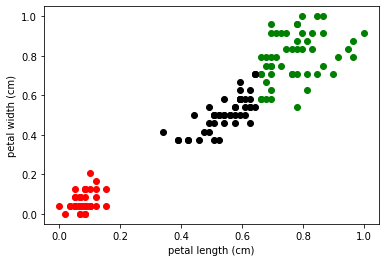

In [65]:
plt.scatter(df1[['petal length (cm)']], df1[['petal width (cm)']], color = 'green')
plt.scatter(df2[['petal length (cm)']], df2[['petal width (cm)']], color = 'red')
plt.scatter(df3[['petal length (cm)']], df3[['petal width (cm)']], color = 'black')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [59]:
scaler = MinMaxScaler()
df['petal length (cm)'] = scaler.fit_transform(df[['petal length (cm)']])
df['petal width (cm)'] = scaler.fit_transform(df[['petal width (cm)']])

# find SSE


In [66]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

G:\ana\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


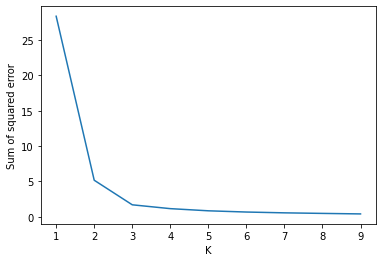

In [67]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

# know doing this for sepal flower

In [68]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,clusterP
0,5.1,3.5,0.067797,0.041667,0,1
1,4.9,3.0,0.067797,0.041667,0,1
2,4.7,3.2,0.050847,0.041667,0,1
3,4.6,3.1,0.084746,0.041667,0,1
4,5.0,3.6,0.067797,0.041667,0,1


In [85]:
km1 = KMeans(n_clusters=3)
syp = km1.fit_predict(df[['sepal length (cm)']], df[['sepal width (cm)']])
syp

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 1, 1, 2, 0, 2, 2, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1])

In [86]:
df['clusterS'] = syp

In [87]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,clusterP,clusterS
0,0.222222,0.625000,0.067797,0.041667,0,1,2
1,0.166667,0.416667,0.067797,0.041667,0,1,2
2,0.111111,0.500000,0.050847,0.041667,0,1,2
3,0.083333,0.458333,0.084746,0.041667,0,1,2
4,0.194444,0.666667,0.067797,0.041667,0,1,2


In [88]:
dff1 = df[df.clusterS == 0]
dff2 = df[df.clusterS == 1]
dff3 = df[df.clusterS == 2]

Text(0, 0.5, 'sepal width')

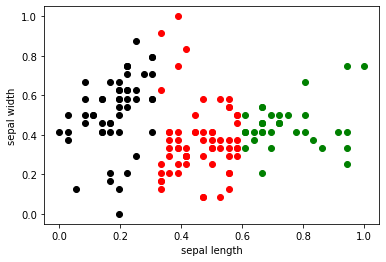

In [89]:
plt.scatter(dff1[['sepal length (cm)']], dff1[['sepal width (cm)']], color = 'green')
plt.scatter(dff2[['sepal length (cm)']], dff2[['sepal width (cm)']], color = 'red')
plt.scatter(dff3[['sepal length (cm)']], dff3[['sepal width (cm)']], color = 'black')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

In [84]:
#minmaxscaler
scalerr = MinMaxScaler()
df['sepal length (cm)'] = scalerr.fit_transform(df[['sepal length (cm)']])
df['sepal width (cm)'] = scalerr.fit_transform(df[['sepal width (cm)']])

# run again from Kmean obejct to check the minmax scalar change
